# 1. Importar los datos

Debemos combinar las etiquetas (labels.csv) con los datos preprocesados (preprocessed_dataset.csv) basándonos en la columna respondent_id.

In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# Cargar los datos preprocesados y las etiquetas
X = pd.read_csv('../../Data/preprocessed_training_dataset.csv')  # Datos preprocesados
y = pd.read_csv('../../Data/training_set_labels.csv')  # Etiquetas

# Unir etiquetas con los datos preprocesados usando respondent_id
dataset = X.merge(y, on='respondent_id')

# Separar características (X) y etiquetas (y)
X = dataset.drop(columns=['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'])  # Características
y = dataset[['h1n1_vaccine', 'seasonal_vaccine']]  # Etiquetas multietiqueta

# 2. Dividir los datos en conjuntos de entrenamiento y prueba

Utilizamos train_test_split para separar los datos.

In [15]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenar un árbol de decisión

Utilizamos DecisionTreeClassifier de Scikit-Learn.

In [16]:
# Modelo de árbol de decisión para multietiqueta
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# 4. Evaluar el modelo

Calculamos las métricas de rendimiento como la precisión, el recall, el F1-score y la exactitud.

Métricas de clasificación multietiqueta:
                  precision    recall  f1-score   support

    h1n1_vaccine       0.00      0.00      0.00      1110
seasonal_vaccine       0.46      0.32      0.37      2497

       micro avg       0.46      0.22      0.30      3607
       macro avg       0.23      0.16      0.19      3607
    weighted avg       0.32      0.22      0.26      3607
     samples avg       0.15      0.12      0.13      3607

Exactitud para H1N1: 0.7916510670160989
Exactitud para vacuna estacional: 0.5046798951703482
AUROC para H1N1: 0.5069830463734055
AUROC para vacuna estacional: 0.4855974797173128


c:\USERS\PABLO\ONEDRIVE\DOCUMENTOS\ESTUDIOS\DATCOM\1ER CUATRIMESTRE\MINERÍA DE DATOS. PREPROCESAMIENTO Y CLASIFICACIÓN\FLUSHOTLEARNING\VENV\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\USERS\PABLO\ONEDRIVE\DOCUMENTOS\ESTUDIOS\DATCOM\1ER CUATRIMESTRE\MINERÍA DE DATOS. PREPROCESAMIENTO Y CLASIFICACIÓN\FLUSHOTLEARNING\VENV\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\USERS\PABLO\ONEDRIVE\DOCUMENTOS\ESTUDIOS\DATCOM\1ER CUATRIMESTRE\MINERÍA DE DATOS. PREPROCESAMIENTO Y CLASIFICACIÓN\FLUSHOTLEARNING\VEN

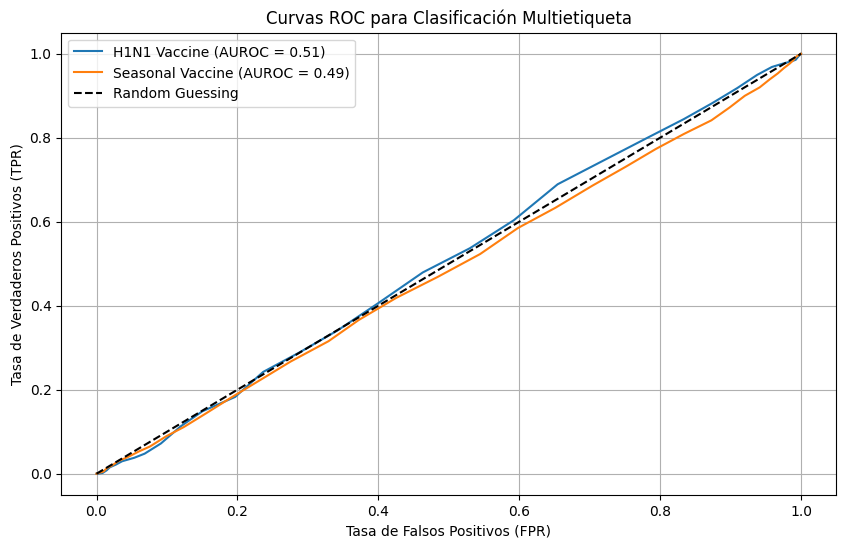

In [17]:
# Métricas de rendimiento
print("Métricas de clasificación multietiqueta:")
print(classification_report(y_test, y_pred, target_names=['h1n1_vaccine', 'seasonal_vaccine']))

# Calcular exactitud para cada etiqueta
accuracy_h1n1 = accuracy_score(y_test['h1n1_vaccine'], y_pred[:, 0])
accuracy_seasonal = accuracy_score(y_test['seasonal_vaccine'], y_pred[:, 1])

print(f"Exactitud para H1N1: {accuracy_h1n1}")
print(f"Exactitud para vacuna estacional: {accuracy_seasonal}")

# Calcular la curva AUROC para ambas etiquetas
y_proba = clf.predict_proba(X_test)

# Convertir las probabilidades en una matriz multietiqueta
y_proba_matrix = pd.DataFrame({
    'h1n1_vaccine': [proba[1] for proba in y_proba[0]],  # Probabilidades de clase 1 para H1N1
    'seasonal_vaccine': [proba[1] for proba in y_proba[1]]  # Probabilidades de clase 1 para vacuna estacional
})

roc_auc_h1n1 = roc_auc_score(y_test['h1n1_vaccine'], y_proba_matrix['h1n1_vaccine'])
roc_auc_seasonal = roc_auc_score(y_test['seasonal_vaccine'], y_proba_matrix['seasonal_vaccine'])

print(f"AUROC para H1N1: {roc_auc_h1n1}")
print(f"AUROC para vacuna estacional: {roc_auc_seasonal}")

# Curvas ROC para visualización
fpr_h1n1, tpr_h1n1, _ = roc_curve(y_test['h1n1_vaccine'], y_proba_matrix['h1n1_vaccine'])
fpr_seasonal, tpr_seasonal, _ = roc_curve(y_test['seasonal_vaccine'], y_proba_matrix['seasonal_vaccine'])

# Gráfica de las curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_h1n1, tpr_h1n1, label=f'H1N1 Vaccine (AUROC = {roc_auc_h1n1:.2f})')
plt.plot(fpr_seasonal, tpr_seasonal, label=f'Seasonal Vaccine (AUROC = {roc_auc_seasonal:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para Clasificación Multietiqueta')
plt.legend()
plt.grid()
plt.show()

# 5. Visualizar el árbol de decisión (opcional)

Podemos visualizar el árbol para comprender cómo toma decisiones.